<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Task-setting" data-toc-modified-id="Task-setting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task setting</a></span><ul class="toc-item"><li><span><a href="#Evaluation-criteria" data-toc-modified-id="Evaluation-criteria-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Evaluation criteria</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Balance-&amp;-split" data-toc-modified-id="Balance-&amp;-split-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Balance &amp; split</a></span><ul class="toc-item"><li><span><a href="#Engineering" data-toc-modified-id="Engineering-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Engineering</a></span><ul class="toc-item"><li><span><a href="#functions" data-toc-modified-id="functions-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>functions</a></span></li><li><span><a href="#split" data-toc-modified-id="split-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>split</a></span></li></ul></li></ul></li><li><span><a href="#S-learner" data-toc-modified-id="S-learner-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>S-learner</a></span><ul class="toc-item"><li><span><a href="#qini-curve" data-toc-modified-id="qini-curve-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>qini curve</a></span></li></ul></li><li><span><a href="#T-learner" data-toc-modified-id="T-learner-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>T-learner</a></span><ul class="toc-item"><li><span><a href="#qini-curve." data-toc-modified-id="qini-curve.-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>qini curve.</a></span></li></ul></li><li><span><a href="#X-learner." data-toc-modified-id="X-learner.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>X-learner.</a></span><ul class="toc-item"><li><span><a href="#qini-curve." data-toc-modified-id="qini-curve.-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>qini curve.</a></span></li></ul></li><li><span><a href="#R-learner" data-toc-modified-id="R-learner-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>R-learner</a></span><ul class="toc-item"><li><span><a href="#qini-curve." data-toc-modified-id="qini-curve.-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>qini curve.</a></span></li></ul></li><li><span><a href="#UpliftRandomForest" data-toc-modified-id="UpliftRandomForest-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>UpliftRandomForest</a></span><ul class="toc-item"><li><span><a href="#qini-curve." data-toc-modified-id="qini-curve.-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>qini curve.</a></span></li></ul></li><li><span><a href="#Grow-points-&amp;-conclusions" data-toc-modified-id="Grow-points-&amp;-conclusions-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Grow points &amp; conclusions</a></span></li></ul></div>

# Import  

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#splittting and validation 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

from causalml.inference.meta import BaseSClassifier, BaseTClassifier, BaseXClassifier, BaseRClassifier
from catboost import CatBoostClassifier

from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
#from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

In [2]:
RANDOM_SEED = 42

# Task setting  

Подобрать оптимальный алгоритм для оценки аплифт-эффекта от рекламных предложений. Наш клиент — французское рекламное агентство criteo. Оно предоставило нам данные о показах рекламы и отклике пользователей на рекламные предложения. Нужно подобрать модель для показа рекламных предложений пользователям. 

## Evaluation criteria 

    2 балла	Построен валидационный датасет. 
    2 балла	Построен S-learner. Оценено качество с помощью qini curve.
    2 балла	Построен T-learner. Оценено качество с помощью qini curve.
    2 балла	Построен X-learner. Оценено качество с помощью qini curve.
    2 балла	Построен R-learner. Оценено качество с помощью qini curve.
    2 балла	Построен UpliftRandomForest. Оценено качество с помощью qini curve.
    3 балла	Сделан вывод о том, какие модели лучше использовать в этом бизнес-кейсе.

# Data  

In [3]:
data = pd.read_csv('criteo-uplift-v2.1.csv')
data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0


Описание данных из источника: 

   - **f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11** feature values (dense, float)
   - **treatment**: treatment group (1 = treated, 0 = control)
   - **conversion**: whether a conversion occured for this user (binary, label)
   - **visit**: whether a visit occured for this user (binary, label)
   - **exposure**: treatment effect, whether the user has been effectively exposed (binary)
   ______________________________________________________________

 - Датасет разделен на контрольную группу и группу воздействия(контактную) в признаке treatment, 
 - выделены 11 описательных признаков, 
 - в conversion указано, совершил ли пользователь желаемое действие, 
 - visit  указывает на переход пользователя, что может быть показателем того, что маркетинговый прием отработал, но сам рекламируемый продукт неинтересен пользователю и конверсия не произошла, 
 - exposure  показывает, стоит ли учитывать роль маркетингового воздействия в последующем поведении пользователя - если экспозиция низка, роль воздействия также низка. 

Proportion: 6:1


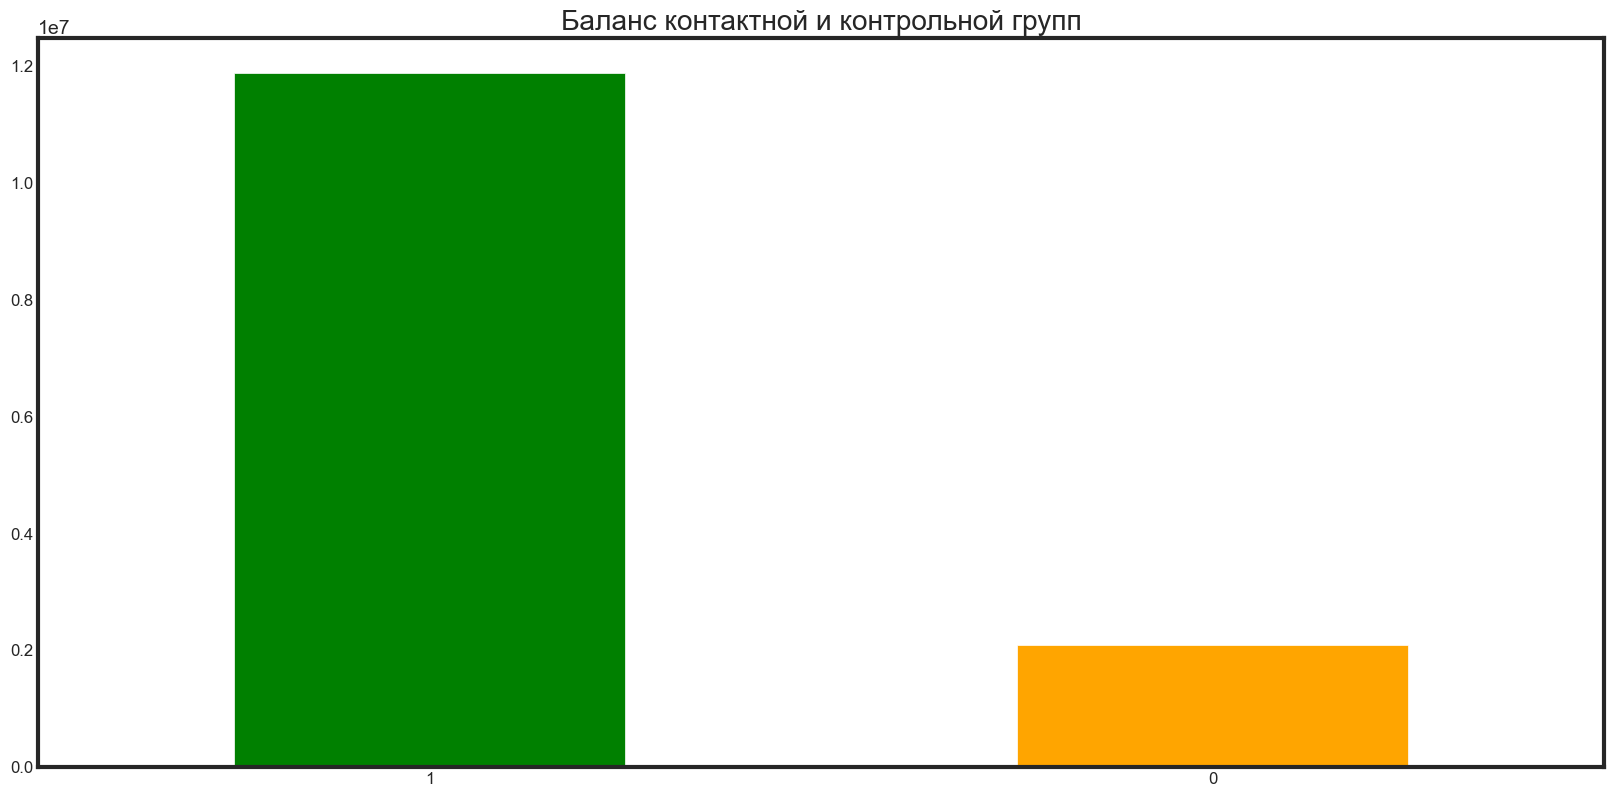

In [4]:
sns.set_style('white')
plt.subplots(figsize=(18, 9))

treatment_groups = data.treatment.value_counts()
treatment_groups.plot(kind="bar",
                      title='Баланс контактной и контрольной групп',
                      color=['green', 'orange'],
                      fontsize=12)
plt.xticks(rotation=0)

print('Proportion:',
      str(int(round(treatment_groups[1] / treatment_groups[0]))) + ':1')

# EDA 

Исследуем некоторые отношнения в данных.

In [49]:
print('Конверсия, по всем пользователям: {}%'.format(
    100 * round(data.conversion.value_counts(normalize=True)[1], 4)))
print('Переходы, по всем пользователям: {}%'.format(
    100 * round(data.visit.value_counts(normalize=True)[1], 4)))
print('____________________________________________')
print('Конверсия, по контактной группе:{}%'.format(
    100 * round(data[data['treatment'] == 1]['conversion'].mean(), 4)))
print('Экспозиция, по контактной группе:{}%'.format(
    100 * round(data[data['treatment'] == 1]['exposure'].mean(), 4)))
print('Переходы, по контактной группе:{}%'.format(
    100* round(data[data['treatment'] == 1]['visit'].mean(), 4)))

print('Конверсия, по экспонированным пользователям: {}%'.format(100 * round(
    data[data['exposure'] == 1]['conversion'].value_counts(normalize=True)[1],
    4)))
print('Конверсия, по НЕэкспонированным пользователям контактной группы: {}%'.
      format(100 * round(
          data[(data['exposure'] == 0)
               & (data['treatment'] == 1)]['conversion'].value_counts(
                   normalize=True)[1], 4)))




Конверсия, по всем пользователям: 0.29%
Переходы, по всем пользователям: 4.7%
____________________________________________
Конверсия, по контактной группе:0.31%
Экспозиция, по контактной группе:3.5999999999999996%
Переходы, по контактной группе:4.8500000000000005%
Конверсия, по экспонированным пользователям: 5.38%
Конверсия, по НЕэкспонированным пользователям контактной группы: 0.12%


<div class="mark"><i class="fa fa-lightbulb-o "></i>  Довольно низкий показатель достаточной экспонированности. Пользователям неинтересно, воздействие происходит невовремя или не по тому каналу - потому что экспонированные пользователии демонстрируют конверсию на значительном уровне.</div>

In [6]:
#эффективность воздействия на переход & конверсию
data[data['treatment'] == 1].groupby('exposure').agg({
    'visit': ['mean', 'sum', 'count'],
    'conversion': ['mean', 'sum', 'count']
})

visit                   conversion                 
              mean     sum     count       mean    sum     count
exposure                                                        
0         0.034861  399314  11454443   0.001194  13680  11454443
1         0.414538  177510    428212   0.053784  23031    428212

Сводка показывает, что экспонированные пользователи хорошо откликаются переходом, демонстрируя высокий CTR 41%, и конверсию 5% от экспонированных. 

Как ведут себя пользователи, не получившие значимой экспозиции: 

In [7]:
data[data['exposure']==0].groupby('treatment').agg({'visit': ['mean', 'sum', 'count'], 'conversion':['mean','sum', 'count']})

visit                   conversion                 
               mean     sum     count       mean    sum     count
treatment                                                        
0          0.038201   80105   2096937   0.001938   4063   2096937
1          0.034861  399314  11454443   0.001194  13680  11454443

<div class="mark"><i class="fa fa-lightbulb-o "></i>
 Пользователи из контрольной группы демонстрируют более высокий показатель переходов и конверсии, чем те, что получили маркетинговое стимулирование и не дослушали. ATE отрицателен - недоэкспонированные пользователи могут перестать откликаться на маркетинговое стимулирование и потерять лояльность к продавцу. Определенно, это критическая точка. </div>

# Balance & split

разделим данные на учебный и валидационный сет, оценим баланс классов в данных для обучения моделей.

In [8]:
train, test  = train_test_split(data, test_size=0.2, random_state=42, stratify=data['treatment'])

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

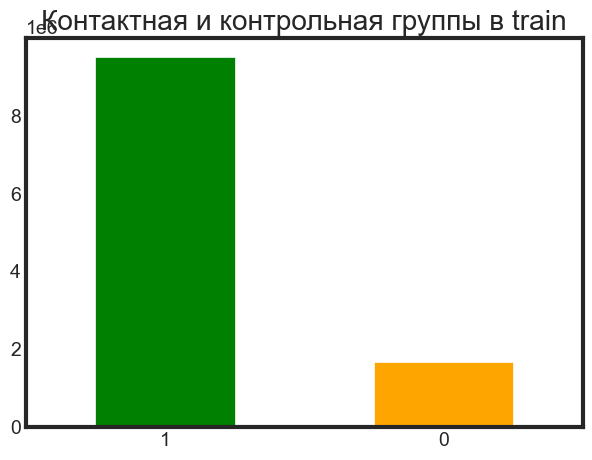

In [48]:
train['treatment'].value_counts().plot(kind='bar', title="Контактная и контрольная группы в train", color=['green', 'orange'])
plt.xticks(rotation=0)

## Engineering

### functions

In [11]:
def target_transformation(data, treatment, target):
    "defining 4 groups of users to target the ones to focus on"
    # control group, no conversion  
    data['target_class'] = 0
    # control group, positive conversion  
    data.loc[(data[treatment] == 0) & (data[target] != 0), 'target_class'] = 1 
    # treated group, no conversion  
    data.loc[(data[treatment] == 1) & (data[target] == 0), 'target_class'] = 2 
    # treated group, positive conversion 
    data.loc[(data[treatment] == 1) &  (data[target] ==1), 'target_class'] = 3 
    
    return data

In [12]:
def qini_data(df, score_col):
    # 1. Отранжируем выборку по значению uplift в убывающем порядке
    ranked = df.sort_values(score_col, ascending=False)
    
    N_c = sum(ranked['target_class'] <= 1)
    N_t = sum(ranked['target_class'] >= 2)
    
    # Посчитаем в отсортированном датафрейме основные показатели, которые используются при расчете qini
    ranked['n_c1'] = 0
    ranked['n_t1'] = 0
    ranked.loc[ranked.target_class == 1,'n_c1'] = 1
    ranked.loc[ranked.target_class == 3,'n_t1'] = 1
    ranked['n_c1/nc'] = ranked.n_c1.cumsum() / N_c
    ranked['n_t1/nt'] = ranked.n_t1.cumsum() / N_t
    
    # Посчитаем qini curve и рандомную прямую под ней
    ranked['uplift'] = round(ranked['n_t1/nt'] - ranked['n_c1/nc'],5)
    # Добавим случайную кривую
    ranked['random_uplift'] = round(ranked[score_col].rank(pct=True, ascending=False) * ranked['uplift'].iloc[-1],5)
    
    ranked["n"] = ranked[score_col].rank(pct=True, ascending=False)
    # Немного кода для визуализации
    plt.plot(ranked['n'], ranked['uplift'], color='r')
    plt.plot(ranked['n'], ranked['random_uplift'], color='b')
    plt.show()
    
    return (ranked['uplift'] - ranked['random_uplift']).sum()

### split

Я выбрала как target  классический признак конверсии, но с учетом картины данных, возможно, интересным будет рассмотреть как целевую переменную visit - 

In [13]:
target = 'conversion'

In [14]:
features = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11'] 

In [15]:
train = target_transformation(train, 'treatment', target)
test = target_transformation(test, 'treatment', target)

In [16]:
# оставим только признаковое описание и целевую 
X_train = train.drop([target, 'target_class'], axis=1)
y_train = train['target_class']
X_test = test.drop([target, 'target_class'], axis=1)
y_test = test['target_class']

# S-learner

S-learner обучается одновременно на двух группах, в совокупности, при этом treatment признак - бинарный. 
Каждый объект из тестовой выборки оценивается дважды: с treatment =1 & treatment =0. Uplift эффект рассчитывается как разность этих оценок. 

In [17]:
features

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']

In [18]:
X_train.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'treatment', 'visit', 'exposure'],
      dtype='object')

In [19]:
s_learner = BaseSClassifier(learner=CatBoostClassifier(random_seed=RANDOM_SEED, verbose=True))

In [20]:
s_learner.fit(X=X_train[features], 
             treatment=X_train['treatment'], 
             y=train[target]) 
uplifts = s_learner.predict(np.array(X_test[features].values.copy()))

Learning rate set to 0.5
0:	learn: 0.0466406	total: 1.89s	remaining: 31m 32s
1:	learn: 0.0164290	total: 3.47s	remaining: 28m 50s
2:	learn: 0.0137213	total: 4.95s	remaining: 27m 26s
3:	learn: 0.0128582	total: 6.52s	remaining: 27m 4s
4:	learn: 0.0126069	total: 7.97s	remaining: 26m 27s
5:	learn: 0.0123769	total: 9.53s	remaining: 26m 18s
6:	learn: 0.0122527	total: 11s	remaining: 25m 55s
7:	learn: 0.0121810	total: 12.3s	remaining: 25m 29s
8:	learn: 0.0120415	total: 14s	remaining: 25m 40s
9:	learn: 0.0120104	total: 15.6s	remaining: 25m 41s
10:	learn: 0.0119782	total: 17.4s	remaining: 26m 1s
11:	learn: 0.0119570	total: 18.8s	remaining: 25m 49s
12:	learn: 0.0119499	total: 20.4s	remaining: 25m 50s
13:	learn: 0.0119259	total: 21.9s	remaining: 25m 44s
14:	learn: 0.0118691	total: 23.6s	remaining: 25m 50s
15:	learn: 0.0118613	total: 25.1s	remaining: 25m 46s
16:	learn: 0.0118560	total: 26.8s	remaining: 25m 46s
17:	learn: 0.0118462	total: 28.2s	remaining: 25m 37s
18:	learn: 0.0118426	total: 29.7s	rem

153:	learn: 0.0113474	total: 4m 4s	remaining: 22m 24s
154:	learn: 0.0113461	total: 4m 6s	remaining: 22m 23s
155:	learn: 0.0113428	total: 4m 7s	remaining: 22m 21s
156:	learn: 0.0113408	total: 4m 9s	remaining: 22m 18s
157:	learn: 0.0113392	total: 4m 10s	remaining: 22m 17s
158:	learn: 0.0113349	total: 4m 12s	remaining: 22m 16s
159:	learn: 0.0113286	total: 4m 14s	remaining: 22m 16s
160:	learn: 0.0113264	total: 4m 15s	remaining: 22m 13s
161:	learn: 0.0113256	total: 4m 17s	remaining: 22m 12s
162:	learn: 0.0113238	total: 4m 19s	remaining: 22m 10s
163:	learn: 0.0113236	total: 4m 20s	remaining: 22m 8s
164:	learn: 0.0113208	total: 4m 22s	remaining: 22m 7s
165:	learn: 0.0113198	total: 4m 24s	remaining: 22m 6s
166:	learn: 0.0113190	total: 4m 25s	remaining: 22m 6s
167:	learn: 0.0113173	total: 4m 27s	remaining: 22m 5s
168:	learn: 0.0113150	total: 4m 29s	remaining: 22m 4s
169:	learn: 0.0113134	total: 4m 30s	remaining: 22m 2s
170:	learn: 0.0113119	total: 4m 32s	remaining: 22m 1s
171:	learn: 0.0113110	

304:	learn: 0.0110973	total: 8m 5s	remaining: 18m 25s
305:	learn: 0.0110954	total: 8m 6s	remaining: 18m 23s
306:	learn: 0.0110938	total: 8m 8s	remaining: 18m 22s
307:	learn: 0.0110925	total: 8m 10s	remaining: 18m 21s
308:	learn: 0.0110914	total: 8m 11s	remaining: 18m 19s
309:	learn: 0.0110899	total: 8m 13s	remaining: 18m 17s
310:	learn: 0.0110885	total: 8m 14s	remaining: 18m 16s
311:	learn: 0.0110861	total: 8m 16s	remaining: 18m 14s
312:	learn: 0.0110842	total: 8m 17s	remaining: 18m 12s
313:	learn: 0.0110834	total: 8m 19s	remaining: 18m 11s
314:	learn: 0.0110823	total: 8m 21s	remaining: 18m 10s
315:	learn: 0.0110806	total: 8m 23s	remaining: 18m 8s
316:	learn: 0.0110791	total: 8m 24s	remaining: 18m 7s
317:	learn: 0.0110777	total: 8m 26s	remaining: 18m 5s
318:	learn: 0.0110767	total: 8m 27s	remaining: 18m 4s
319:	learn: 0.0110753	total: 8m 29s	remaining: 18m 2s
320:	learn: 0.0110737	total: 8m 31s	remaining: 18m 1s
321:	learn: 0.0110724	total: 8m 32s	remaining: 17m 59s
322:	learn: 0.01107

453:	learn: 0.0109032	total: 12m 2s	remaining: 14m 28s
454:	learn: 0.0109026	total: 12m 3s	remaining: 14m 27s
455:	learn: 0.0109012	total: 12m 5s	remaining: 14m 25s
456:	learn: 0.0109001	total: 12m 6s	remaining: 14m 23s
457:	learn: 0.0108992	total: 12m 8s	remaining: 14m 22s
458:	learn: 0.0108985	total: 12m 10s	remaining: 14m 20s
459:	learn: 0.0108967	total: 12m 12s	remaining: 14m 19s
460:	learn: 0.0108958	total: 12m 13s	remaining: 14m 17s
461:	learn: 0.0108949	total: 12m 15s	remaining: 14m 16s
462:	learn: 0.0108937	total: 12m 16s	remaining: 14m 14s
463:	learn: 0.0108894	total: 12m 18s	remaining: 14m 13s
464:	learn: 0.0108886	total: 12m 20s	remaining: 14m 11s
465:	learn: 0.0108872	total: 12m 21s	remaining: 14m 9s
466:	learn: 0.0108863	total: 12m 23s	remaining: 14m 8s
467:	learn: 0.0108853	total: 12m 24s	remaining: 14m 6s
468:	learn: 0.0108837	total: 12m 26s	remaining: 14m 5s
469:	learn: 0.0108828	total: 12m 28s	remaining: 14m 3s
470:	learn: 0.0108817	total: 12m 29s	remaining: 14m 1s
471

601:	learn: 0.0107246	total: 15m 59s	remaining: 10m 34s
602:	learn: 0.0107225	total: 16m 1s	remaining: 10m 32s
603:	learn: 0.0107219	total: 16m 3s	remaining: 10m 31s
604:	learn: 0.0107207	total: 16m 4s	remaining: 10m 29s
605:	learn: 0.0107202	total: 16m 6s	remaining: 10m 28s
606:	learn: 0.0107196	total: 16m 7s	remaining: 10m 26s
607:	learn: 0.0107184	total: 16m 9s	remaining: 10m 25s
608:	learn: 0.0107174	total: 16m 11s	remaining: 10m 23s
609:	learn: 0.0107163	total: 16m 12s	remaining: 10m 21s
610:	learn: 0.0107147	total: 16m 14s	remaining: 10m 20s
611:	learn: 0.0107132	total: 16m 15s	remaining: 10m 18s
612:	learn: 0.0107121	total: 16m 17s	remaining: 10m 17s
613:	learn: 0.0107103	total: 16m 19s	remaining: 10m 15s
614:	learn: 0.0107090	total: 16m 21s	remaining: 10m 14s
615:	learn: 0.0107079	total: 16m 22s	remaining: 10m 12s
616:	learn: 0.0107074	total: 16m 24s	remaining: 10m 10s
617:	learn: 0.0107069	total: 16m 25s	remaining: 10m 9s
618:	learn: 0.0107057	total: 16m 27s	remaining: 10m 7s


751:	learn: 0.0105568	total: 20m 12s	remaining: 6m 39s
752:	learn: 0.0105558	total: 20m 14s	remaining: 6m 38s
753:	learn: 0.0105550	total: 20m 16s	remaining: 6m 36s
754:	learn: 0.0105537	total: 20m 18s	remaining: 6m 35s
755:	learn: 0.0105526	total: 20m 20s	remaining: 6m 33s
756:	learn: 0.0105520	total: 20m 21s	remaining: 6m 32s
757:	learn: 0.0105507	total: 20m 23s	remaining: 6m 30s
758:	learn: 0.0105504	total: 20m 25s	remaining: 6m 29s
759:	learn: 0.0105494	total: 20m 27s	remaining: 6m 27s
760:	learn: 0.0105483	total: 20m 28s	remaining: 6m 25s
761:	learn: 0.0105464	total: 20m 30s	remaining: 6m 24s
762:	learn: 0.0105451	total: 20m 32s	remaining: 6m 22s
763:	learn: 0.0105443	total: 20m 34s	remaining: 6m 21s
764:	learn: 0.0105439	total: 20m 36s	remaining: 6m 19s
765:	learn: 0.0105431	total: 20m 38s	remaining: 6m 18s
766:	learn: 0.0105431	total: 20m 40s	remaining: 6m 16s
767:	learn: 0.0105425	total: 20m 41s	remaining: 6m 15s
768:	learn: 0.0105415	total: 20m 43s	remaining: 6m 13s
769:	learn

902:	learn: 0.0104130	total: 24m 26s	remaining: 2m 37s
903:	learn: 0.0104118	total: 24m 28s	remaining: 2m 35s
904:	learn: 0.0104113	total: 24m 29s	remaining: 2m 34s
905:	learn: 0.0104102	total: 24m 31s	remaining: 2m 32s
906:	learn: 0.0104083	total: 24m 33s	remaining: 2m 31s
907:	learn: 0.0104063	total: 24m 35s	remaining: 2m 29s
908:	learn: 0.0104057	total: 24m 36s	remaining: 2m 27s
909:	learn: 0.0104046	total: 24m 38s	remaining: 2m 26s
910:	learn: 0.0104037	total: 24m 39s	remaining: 2m 24s
911:	learn: 0.0104024	total: 24m 41s	remaining: 2m 22s
912:	learn: 0.0104020	total: 24m 43s	remaining: 2m 21s
913:	learn: 0.0104008	total: 24m 44s	remaining: 2m 19s
914:	learn: 0.0103994	total: 24m 46s	remaining: 2m 18s
915:	learn: 0.0103978	total: 24m 48s	remaining: 2m 16s
916:	learn: 0.0103970	total: 24m 49s	remaining: 2m 14s
917:	learn: 0.0103963	total: 24m 51s	remaining: 2m 13s
918:	learn: 0.0103950	total: 24m 53s	remaining: 2m 11s
919:	learn: 0.0103941	total: 24m 55s	remaining: 2m 10s
920:	learn

In [21]:
uplifts

array([[1.51311595e-05],
       [5.84039628e-05],
       [2.68061447e-05],
       ...,
       [1.33309149e-05],
       [1.54464748e-04],
       [1.33449203e-05]])

In [22]:
test['uplift_score'] = uplifts

## qini curve

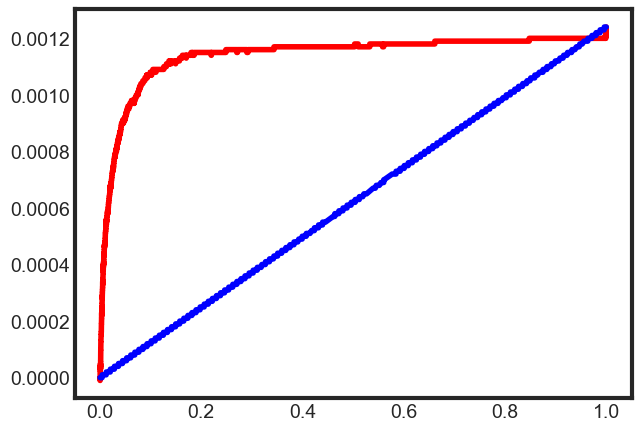

1452.5107499999997

In [24]:
qini_data(test, 'uplift_score')

Отличный результат! Идем дальше. 

# T-learner

При использовании T-learner используется две модели: 
 - одна оценивает вероятность конверсии в контактной группе, 
 - вторая оценивает вероятность конверсии на группе без воздействия.
     Затем для каждого наблюдения рассчитывается разность оценок вероятностей двух моделей. 

In [25]:
t_learner = BaseTClassifier(learner=CatBoostClassifier(random_seed=RANDOM_SEED, verbose=10))

In [26]:
t_learner.fit(X=X_train[features],
             treatment=X_train['treatment'], 
             y=train[target])
t_uplifts = t_learner.predict(np.array(X_test[features].values.copy()))

Learning rate set to 0.245398
0:	learn: 0.1873160	total: 326ms	remaining: 5m 25s
10:	learn: 0.0086146	total: 3.14s	remaining: 4m 42s
20:	learn: 0.0083557	total: 6.01s	remaining: 4m 40s
30:	learn: 0.0082402	total: 8.82s	remaining: 4m 35s
40:	learn: 0.0081382	total: 11.7s	remaining: 4m 33s
50:	learn: 0.0080528	total: 14.6s	remaining: 4m 31s
60:	learn: 0.0079951	total: 17.4s	remaining: 4m 27s
70:	learn: 0.0079230	total: 20.2s	remaining: 4m 24s
80:	learn: 0.0078544	total: 23.1s	remaining: 4m 22s
90:	learn: 0.0078043	total: 26s	remaining: 4m 19s
100:	learn: 0.0077524	total: 28.9s	remaining: 4m 16s
110:	learn: 0.0077065	total: 31.7s	remaining: 4m 13s
120:	learn: 0.0076546	total: 34.6s	remaining: 4m 11s
130:	learn: 0.0076156	total: 37.5s	remaining: 4m 8s
140:	learn: 0.0075641	total: 40.3s	remaining: 4m 5s
150:	learn: 0.0075171	total: 43.3s	remaining: 4m 3s
160:	learn: 0.0074871	total: 46.1s	remaining: 4m
170:	learn: 0.0074448	total: 49.1s	remaining: 3m 57s
180:	learn: 0.0074098	total: 51.8s	r

520:	learn: 0.0113341	total: 12m 1s	remaining: 11m 3s
530:	learn: 0.0113187	total: 12m 15s	remaining: 10m 49s
540:	learn: 0.0113043	total: 12m 28s	remaining: 10m 35s
550:	learn: 0.0112921	total: 12m 42s	remaining: 10m 21s
560:	learn: 0.0112784	total: 12m 56s	remaining: 10m 7s
570:	learn: 0.0112659	total: 13m 9s	remaining: 9m 53s
580:	learn: 0.0112509	total: 13m 22s	remaining: 9m 38s
590:	learn: 0.0112388	total: 13m 35s	remaining: 9m 24s
600:	learn: 0.0112260	total: 13m 49s	remaining: 9m 10s
610:	learn: 0.0112127	total: 14m 2s	remaining: 8m 56s
620:	learn: 0.0111981	total: 14m 16s	remaining: 8m 42s
630:	learn: 0.0111867	total: 14m 29s	remaining: 8m 28s
640:	learn: 0.0111750	total: 14m 43s	remaining: 8m 14s
650:	learn: 0.0111624	total: 14m 56s	remaining: 8m
660:	learn: 0.0111535	total: 15m 10s	remaining: 7m 46s
670:	learn: 0.0111339	total: 15m 23s	remaining: 7m 32s
680:	learn: 0.0111216	total: 15m 36s	remaining: 7m 18s
690:	learn: 0.0111105	total: 15m 50s	remaining: 7m 4s
700:	learn: 0.0

In [27]:
test['t_uplifts_score'] = t_uplifts

## qini curve.

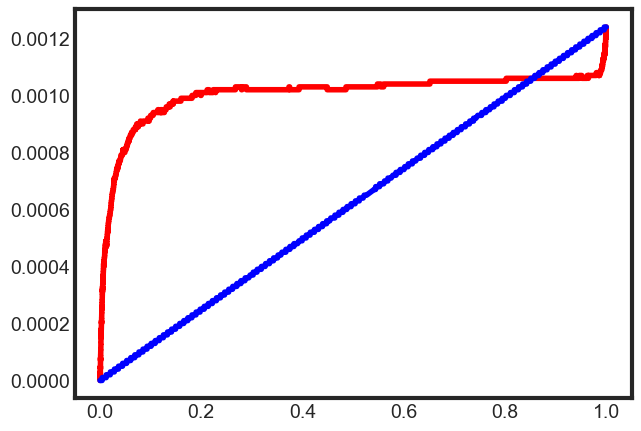

1075.1276999999998

In [28]:
qini_data(test, 't_uplifts_score')

S learner справился лучше 

# X-learner. 

Метод основан на построении двух моделей, и рекомендован для тех случаев, когда целевая группа относительно маленькая. 
 - Сначала обучаются две модели: одна на контрольной группе, другая - на целевой, 
 - Затем преобразуются целевые переменые, используя 
     - предсказания контрольной модели на данных контактной группы и
     - предсказания целевой модели на данных контактной группы.
 - Обучаются две новые модели на преобразованных целевых. Взвешенная сумма предсказаний этих двух моделей и будет uplift.

In [29]:
x_learner = BaseXClassifier(
    outcome_learner=LogisticRegression(random_state=RANDOM_SEED),
    effect_learner= LinearRegression())

x_learner.fit(X=X_train[features],
              treatment=X_train['treatment'],
              y=train[target])

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

In [30]:
X_uplifts = x_learner.predict(np.array(X_test[features].values.copy()))

In [31]:
test['X_uplifts'] = X_uplifts

## qini curve.

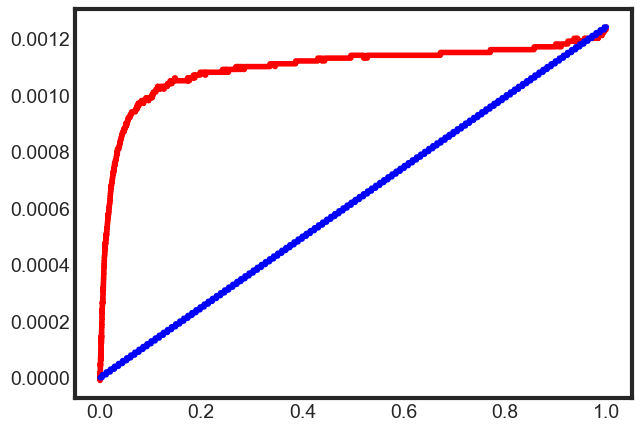

1329.5068600000013

In [32]:
qini_data(test, 'X_uplifts')

# R-learner 

R-learner адаптирован для работы с несбалансированными данными. Две модели обучаются out-of-fold, делая предсказание на части данных, uplift рассчитывается как сумма предсказания без дополнительного воздействия и эффект от воздействия, взвешенный на вероятность попадания наблюдения в контактную группу(долю контактный наблюдений в общей выборке).


In [33]:
r_learner = BaseRClassifier(outcome_learner = LogisticRegression(), 
                           effect_learner=LinearRegression())

In [34]:
r_learner.fit(X=X_train[features],
             treatment=X_train['treatment'],
             y=y_train)

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

In [35]:
r_uplifts = r_learner.predict(np.array(X_test[features].values.copy()))

In [37]:
test['R_uplifts'] = r_uplifts

## qini curve.

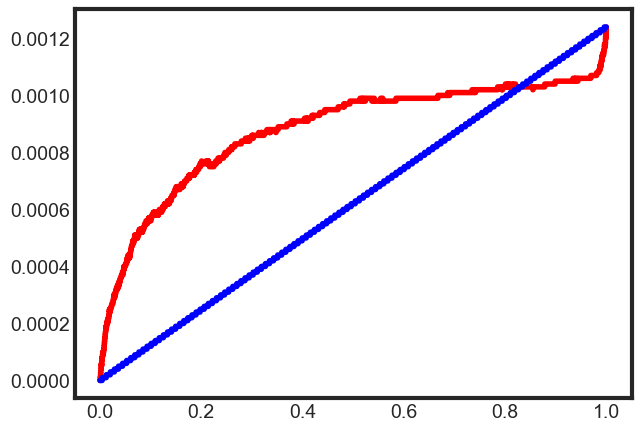

717.5879699999998

In [38]:
qini_data(test, 'R_uplifts')

# UpliftRandomForest 

При применении алгоритма Случайного леса происходит разбиение с вычислением разницы между распределениями в контрольной и контактной группах. Алгоритм старается найти объекты в целевой группе, которые очень сильно отличаются от объектов контрольной группы. Для пробы как функцию разделения задам евклидово расстояние.

In [42]:
forest_clf = UpliftRandomForestClassifier(max_depth=5, min_samples_leaf=200, min_samples_treatment=50, n_reg=100, evaluationFunction='ED', control_name='0')


In [43]:
forest_clf.fit(X_train[features].values, 
            treatment=X_train['treatment'].apply(str).values, 
            y=y_train.values)

invalid value encountered in sqrt
invalid value encountered in sqrt
invalid value encountered in sqrt


In [44]:
forest_uplifts = forest_clf.predict(np.array(test[features].values))


In [45]:
test['forest_uplifts'] = forest_uplifts

## qini curve.

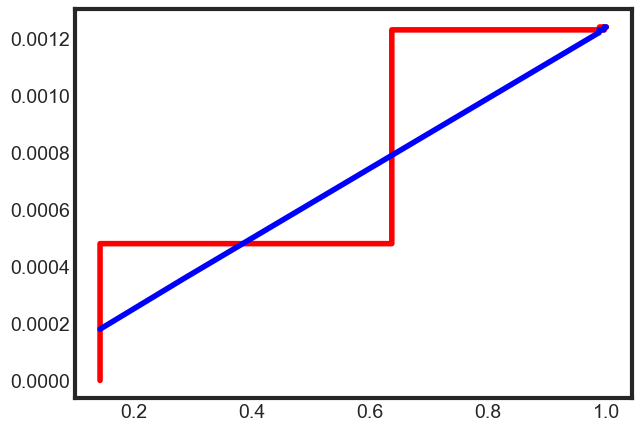

170.4436199999999

In [46]:
qini_data(test, 'forest_uplifts')

# Grow points & conclusions

Модель, показывающая наилучший результат в текущих условиях -S-learner. 
Данные разбалансированы по контрольной и контактной группам, но это сильно компенсируется тем, что экспозиция в контактной группе на очень невысоком уровне. Получается, что количественный перевес компенсируется низкой частотностью конверсии. S-learner как алгоритм, обучающий одну модель и на контрольной, и на контактной группах, наилучшим образом улавливает закономерность.

Для дальнейшей работы следует ответить на вопрос: насколько заказчику интересно оценивать конверсию по контактной группе, с учетом уровней экспозиции?
С учетом ответа можно: 
 - скорректировать самое маркетинговое воздействие так, чтобы повысить экспозицию; 
 - "взвесить" контактную группу и учитывать как контактных только клиентов с каким-то обоснованным порогом экспозиции.

<div class="girk">
Спасибо за то, что дошли до конца и внимание к этой работе! :)</div><i class="fa fa-lightbulb-o "></i>